# Análisis Exploratorio de Datos

Fecha: 25 de febrero de 2025

Integrantes:
* Fernando Mendoza Velasco
* Mónica Lizette Cardona Solís
* Marianna Montserrat Curiel Zambrano

## Análisis exploratorio de datos

Consiste en tres tareas:

1. Interpretar y cargar el conjunto de datos en el entorno.
2. Revisar si hay valores faltantes o incorrectos.
3. Obtener estadísticas descriptivas básicas e identificar valores atípicos.

In [1]:
import pandas as pd
import numpy as np

PATH_DATASET = "./dataset/student-por.csv"

# Cargar los datos del CSV en un dataframe de Pandas.
df = pd.read_csv(PATH_DATASET)

# Mostrar las primeras 5 filas del dataset.
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [3]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


**TODO** Considerar si es mejor usar boxplots en vez de (o además de) histogramas.

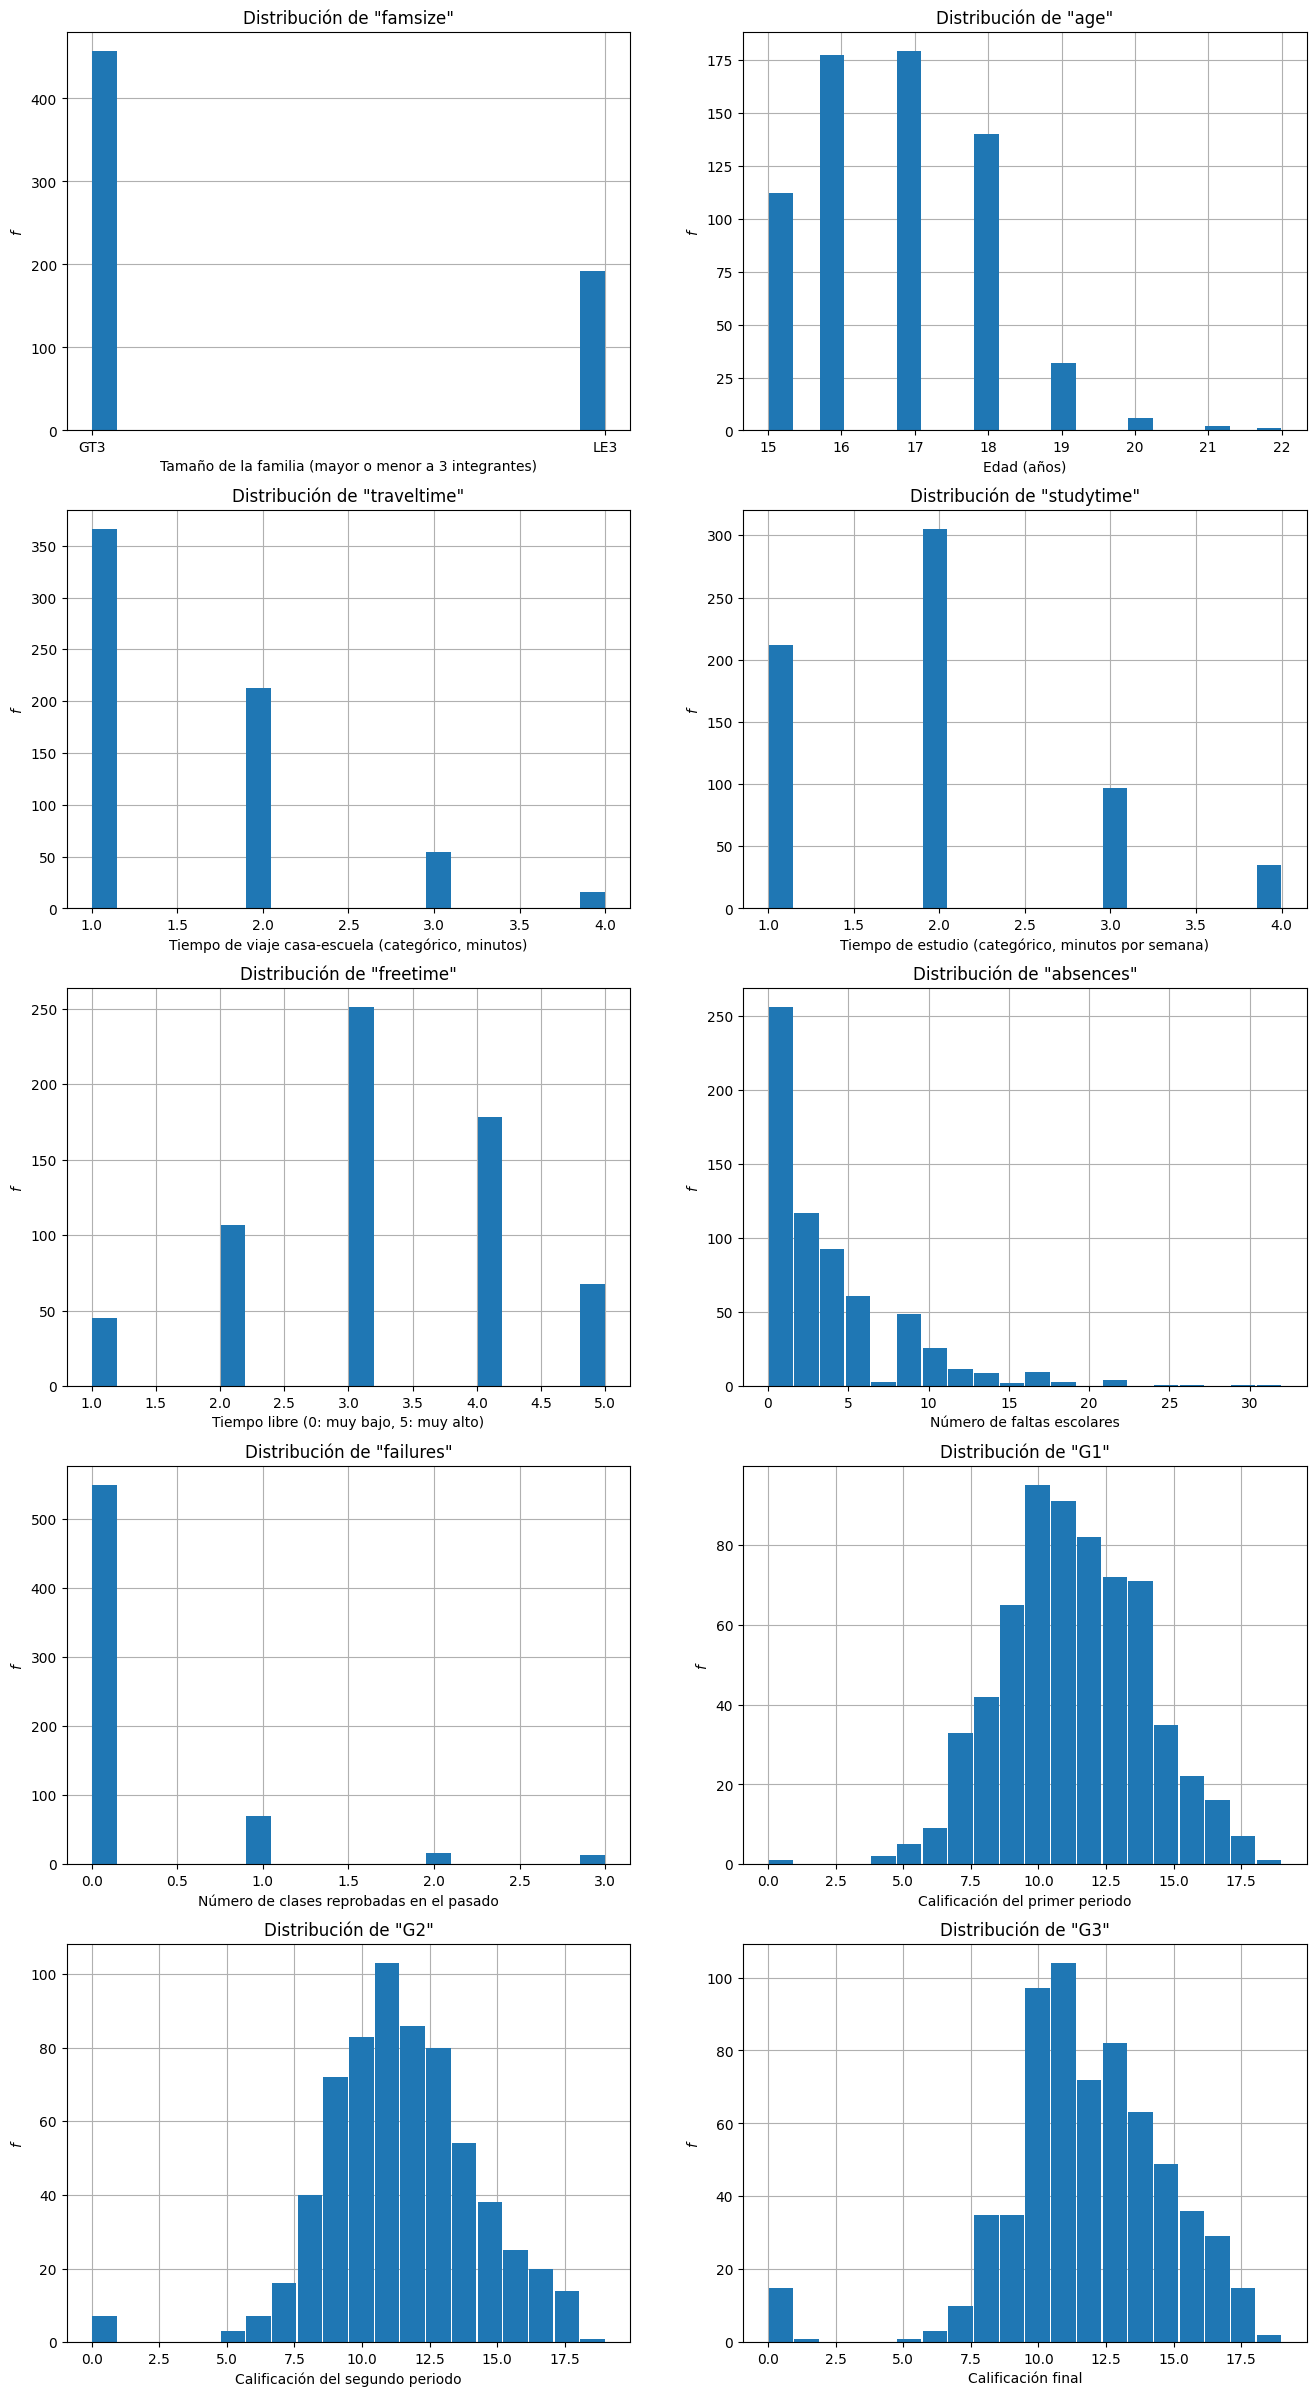

In [4]:
from math import ceil
import matplotlib.pyplot as plt

columnas_visualizadas = ["famsize", "age", "traveltime", "studytime", "freetime", "absences", "failures", "G1", "G2", "G3"]
labels = [
    "Tamaño de la familia (mayor o menor a 3 integrantes)", 
    "Edad (años)", 
    "Tiempo de viaje casa-escuela (categórico, minutos)", 
    "Tiempo de estudio (categórico, minutos por semana)",
    "Tiempo libre (0: muy bajo, 5: muy alto)",
    "Número de faltas escolares",
    "Número de clases reprobadas en el pasado",
    "Calificación del primer periodo",
    "Calificación del segundo periodo",
    "Calificación final"
]

NUM_COLUMNS_IN_FIGURE = 2
NUM_ROWS_IN_FIGURE = ceil(len(columnas_visualizadas) / NUM_COLUMNS_IN_FIGURE)

fig, axes = plt.subplots(NUM_ROWS_IN_FIGURE, NUM_COLUMNS_IN_FIGURE)
fig.set_size_inches(16, NUM_ROWS_IN_FIGURE * 6)

i =  0
for row in axes:
    for ax in row:
        if i < len(columnas_visualizadas):
            ax.hist(df[columnas_visualizadas[i]], bins=20, rwidth=0.95, zorder=2)
            ax.set_title(f"Distribución de \"{columnas_visualizadas[i]}\"")
            ax.set_xlabel(labels[i])
            ax.set_ylabel(r"$f$")
            ax.grid(True)
        else:
            fig.delaxes(ax)

        i += 1
        
plt.savefig("graficas/student/histogramas_2.png", dpi=300)

plt.show()

In [5]:
df_valores_numericos = df.copy()
df_valores_numericos["sex"] = df_valores_numericos["sex"].map({"F": 1, "M": 0})
df_valores_numericos["address"] = df_valores_numericos["address"].map({"U": 1, "R": 0})
df_valores_numericos["famsize"] = df_valores_numericos["famsize"].map({"GT3": 1, "LE3": 0})
df_valores_numericos["Pstatus"] = df_valores_numericos["Pstatus"].map({"T": 1, "A": 0})
df_valores_numericos.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,1,1,0,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,1,17,1,1,1,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,1,15,1,0,1,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,1,15,1,1,1,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,1,16,1,1,1,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Correlación

El conjunto de datos original incluye 33 columnas, pero solo un subconjunto de características será suficientemente significativo como para predecir la variable objetivo. Esta sección presenta los índices de correlación entre las columnas, por medio de mapas de calor.

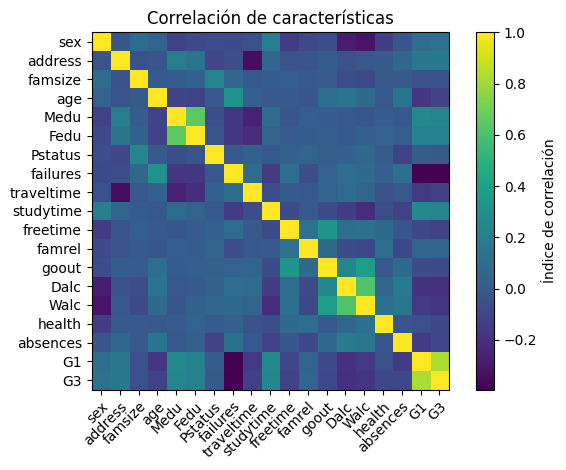

In [6]:
col_correlacion = ["sex", "address", "famsize", "age", "Medu", "Fedu", "Pstatus", "failures", "traveltime", "studytime", "freetime", "famrel", "goout", "Dalc", "Walc", "health", "absences", "G1", "G3"]

matriz_correlacion = df_valores_numericos[col_correlacion].corr()

fig, ax = plt.subplots()
im = ax.imshow(matriz_correlacion)

# Agregar anotaciones en los ejes y en cada recuadro del mapa.
ax.set_xticks(range(len(col_correlacion)), labels=col_correlacion, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(col_correlacion)), labels=col_correlacion)

ax.set_title("Correlación de características")

fig.colorbar(im, ax=ax, label='Índice de correlación')
fig.tight_layout()

plt.savefig("graficas/student/mapa_correlacion_2.png", dpi=300)
plt.show()

In [7]:
matriz_correlacion["G3"].sort_values()

failures     -0.393316
Dalc         -0.204719
Walc         -0.176619
traveltime   -0.127173
freetime     -0.122705
age          -0.106505
health       -0.098851
absences     -0.091379
goout        -0.087641
famsize      -0.045016
Pstatus      -0.000754
famrel        0.063361
sex           0.129077
address       0.167637
Fedu          0.211800
Medu          0.240151
studytime     0.249789
G1            0.826387
G3            1.000000
Name: G3, dtype: float64

Sólo las calificaciones parciales tienen índices de correlación evidentemente grandes con la calificación final. Aún así, hay otras características que presentan índices de correlación de magnitud razonable. Para balancear, se decidió incluir las características con índice de correlación absoluto mayor a 0.15.

In [8]:
indice_correlacion_min = 0.15
sorted_corr = matriz_correlacion["G3"].sort_values()
principales_correlaciones = [sorted_corr.index[i] for i in range(len(sorted_corr)) if abs(sorted_corr.values[i]) >= indice_correlacion_min]
principales_correlaciones

['failures',
 'Dalc',
 'Walc',
 'address',
 'Fedu',
 'Medu',
 'studytime',
 'G1',
 'G3']

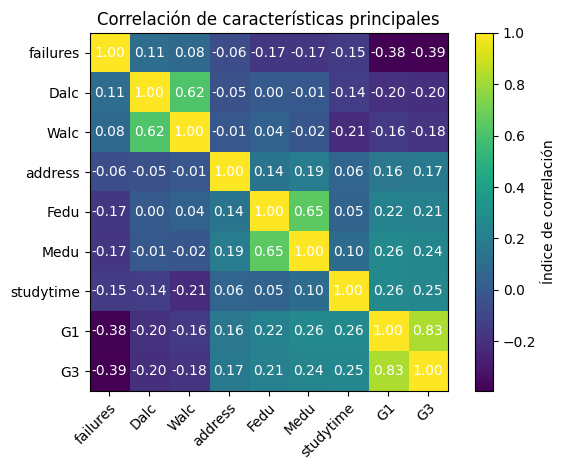

In [9]:
matriz_correlacion = df_valores_numericos[principales_correlaciones].corr()

fig, ax = plt.subplots()
im = ax.imshow(matriz_correlacion)

# Agregar anotaciones en los ejes y en cada recuadro del mapa.
ax.set_xticks(range(len(principales_correlaciones)), labels=principales_correlaciones, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(principales_correlaciones)), labels=principales_correlaciones)

for i in range(len(principales_correlaciones)):
    for j in range(len(principales_correlaciones)):
        text = ax.text(j, i, f"{matriz_correlacion.iloc[i].iloc[j]:.2f}", ha="center", va="center", color="w")

ax.set_title("Correlación de características principales")

fig.colorbar(im, ax=ax, label='Índice de correlación')
fig.tight_layout()

plt.savefig("graficas/student/mapa_correlacion_2_principal.png", dpi=300)
plt.show()

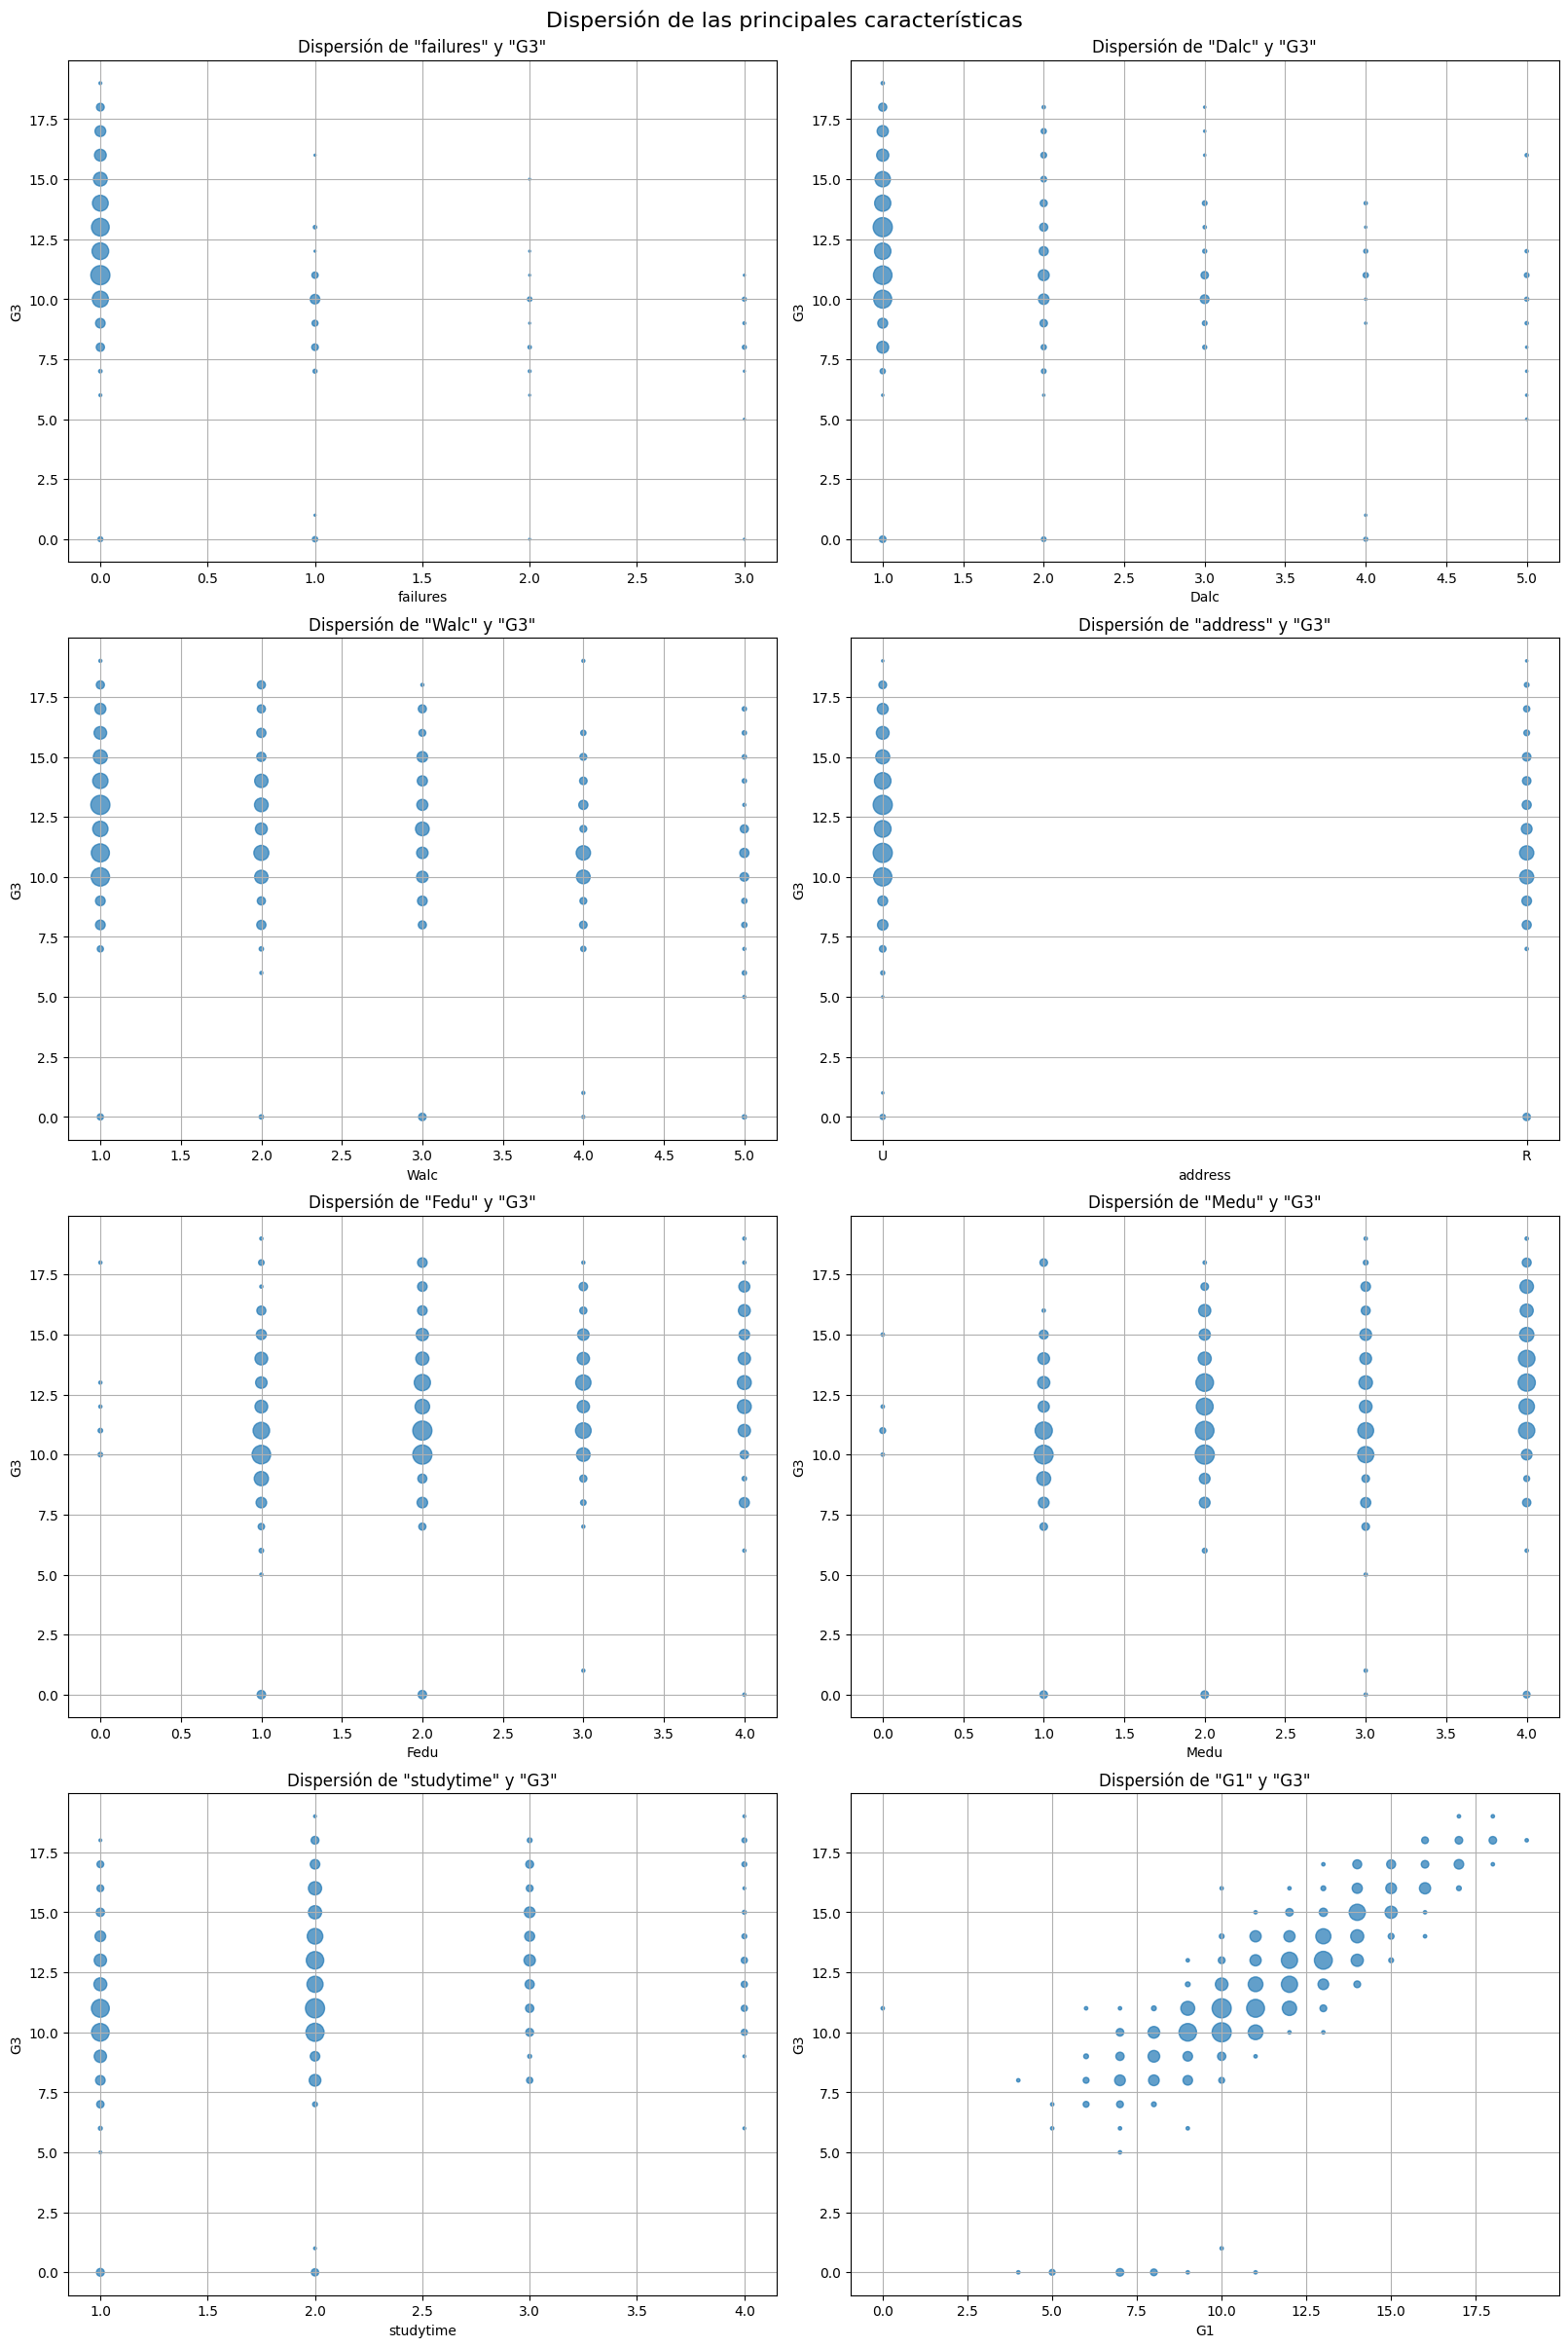

In [10]:
caracteristica_predicha = "G3"
n_plots = len(principales_correlaciones) - 1
ncols = 2
nrows = ceil(n_plots / ncols)

fig, axs = plt.subplots(nrows, ncols, layout="constrained")
fig.suptitle("Dispersión de las principales características", fontsize=16)
fig.set_size_inches(16, 6 * nrows)

i =  0
for row in axs:
    for ax in row:
        if i < n_plots:
            counts = {}
            for j in range(len(df[caracteristica_predicha])):
                key = (df[principales_correlaciones[i]][j], df[caracteristica_predicha][j])

                if key not in counts:
                    counts[key] = 0

                counts[key] += 1

            caracteristica = [key[0] for key in counts.keys()]
            prediccion = [key[1] for key in counts.keys()]

            highest_count = max(counts.values())
            marker_sizes = [200 * (float(count) / highest_count) for count in counts.values()]

            ax.scatter(caracteristica, prediccion, s=marker_sizes, alpha=0.7)
            ax.set_title(f"Dispersión de \"{principales_correlaciones[i]}\" y \"{caracteristica_predicha}\"")
            # ax.set_xticks(np.arange(min(failures), max(failures) + 1, 1.0))
            ax.set_xlabel(principales_correlaciones[i])
            ax.set_ylabel(caracteristica_predicha)

            ax.grid(True)
        else:
            fig.delaxes(ax)

        i += 1

plt.savefig("graficas/student/scatter_principales_correlaciones.png", dpi=300)
plt.show()

## Planteamiento e implementación de modelos

Esta sección implementa dos modelos de regresión con múltiples variables independientes:

1. Clasificación binaria para indicar si un estudiante aprobó o reprobó en su calificación final. Usa regresión logística para clasificar.
2. Predicción del valor numérico de la calificación final (0-20). Usa regresión lineal.

El primer paso es definir una columna adicional _G3_passing_, que tiene valor 1 si el valor de la columna _G3_ es mayor o igual a la calificación aprobatoria, o 0 en caso contrario.

In [11]:
calificacion_aprobatoria = 10

df_valores_numericos["G3_passing"] = df_valores_numericos["G3"].transform(lambda g3: 1 if g3 >= calificacion_aprobatoria else 0)
df_valores_numericos.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_passing
0,GP,1,18,1,1,0,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,1,17,1,1,1,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1
2,GP,1,15,1,0,1,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,1,15,1,1,1,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,1,16,1,1,1,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1


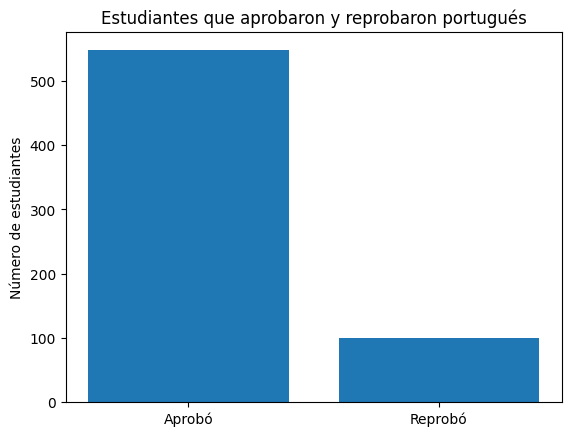

In [12]:
total_g3_aprobatoria = df_valores_numericos["G3_passing"].map({0: "Reprobó", 1: "Aprobó"}).value_counts()

fig, ax = plt.subplots()
ax.bar(total_g3_aprobatoria.index, total_g3_aprobatoria.values)
ax.set_ylabel("Número de estudiantes")
ax.set_title("Estudiantes que aprobaron y reprobaron portugués")

plt.savefig("graficas/student/g3_aprobatoria.png", dpi=300)
plt.show()

### Clasificación binaria

In [13]:
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
test_size = 0.25
random_state = 80
scaler = StandardScaler()

col_caracteristicas = principales_correlaciones[:-1]

g3_entrenamiento, g3_prueba = train_test_split(df_valores_numericos["G3"].values, test_size=test_size, random_state=random_state)
g3_passing_entrenamiento, g3_passing_prueba = train_test_split(df_valores_numericos["G3_passing"].values, test_size=test_size, random_state=random_state)

X = df_valores_numericos[col_caracteristicas].values
X_entrenamiento, X_prueba = train_test_split(X, test_size=test_size, random_state=random_state)

X_entrenamiento_std = scaler.fit_transform(X_entrenamiento, g3_passing_entrenamiento)
X_prueba_std = scaler.fit_transform(X_prueba, g3_passing_prueba)

f"{len(g3_passing_entrenamiento)} datos de entrenamiento, {len(g3_passing_prueba)} datos de prueba"

'486 datos de entrenamiento, 163 datos de prueba'

In [15]:
class RegresionLogistica:

    def ajustar(self, X, y):
        self.m = len(y)

        X_entrenamiento_std_adaptada = np.c_[np.ones((X.shape[0], 1)), X]
        theta_inicial = np.zeros(X_entrenamiento_std_adaptada.shape[1])

        self.theta = minimize(self.costo, theta_inicial, args=(X_entrenamiento_std_adaptada, y), method="BFGS").x


    def predecir(self, caracteristicas):
        caracteristicas_bias_scaled = np.c_[np.ones((caracteristicas.shape[0], 1)), caracteristicas]
        predicciones_prob = self.sigmoide(caracteristicas_bias_scaled @ self.theta)
        self.y_pred = [1 if y_pred >= 0.5 else 0 for y_pred in predicciones_prob]
        return self.y_pred


    def calcular_puntaje_exactitud(self, y_true):
        return accuracy_score(y_true, self.y_pred)


    def sigmoide(self, z):
        return 1 / (1 + np.exp(-z))
    

    def l2(self, theta, valor_lambda):
        return valor_lambda * np.sum(theta[1:self.m]**2) / (2 * self.m)
    
    
    def costo(self, theta, X, y, valor_lambda=0.1):
        h = self.sigmoide(X @ np.transpose(theta))
        epsilon = 1e-5
        valor_costo = - (np.dot(y, np.log(h + epsilon)) + np.dot((1 - y), np.log(1 - h + epsilon))) / self.m
        return valor_costo + self.l2(theta, valor_lambda)

In [16]:
clasificador_binario = RegresionLogistica()

clasificador_binario.ajustar(X_entrenamiento_std, g3_passing_entrenamiento)

display(f"Coeficientes theta = {clasificador_binario.theta}")

predicciones_g3_aprobatoria = clasificador_binario.predecir(X_prueba_std)

display(f"Predicciones para aprobar G3: {predicciones_g3_aprobatoria[:10]}")

display(f"Accuracy score = {clasificador_binario.calcular_puntaje_exactitud(g3_passing_prueba)}")

'Coeficientes theta = [ 3.62385629 -0.2209503   0.09014452 -0.24410268  0.06576484  0.08203695\n  0.02013778 -0.03321234  2.84286498]'

'Predicciones para aprobar G3: [0, 1, 0, 1, 1, 1, 1, 1, 1, 1]'

'Accuracy score = 0.9325153374233128'

In [17]:
positivos_verdaderos = np.sum([1 if predicciones_g3_aprobatoria[i] == 1 and g3_passing_prueba[i] == 1 else 0 for i in range(len(g3_passing_prueba))])
negativos_verdaderos = np.sum([1 if predicciones_g3_aprobatoria[i] == 0 and g3_passing_prueba[i] == 0 else 0 for i in range(len(g3_passing_prueba))])
falsos_positivos = np.sum([1 if predicciones_g3_aprobatoria[i] == 1 and g3_passing_prueba[i] == 0 else 0 for i in range(len(g3_passing_prueba))])
falsos_negativos = np.sum([1 if predicciones_g3_aprobatoria[i] == 0 and g3_passing_prueba[i] == 1 else 0 for i in range(len(g3_passing_prueba))])

display(f"Verdaderos positivos: {positivos_verdaderos}")
display(f"Verdaderos negativos: {negativos_verdaderos}")
display(f"Falsos positivos: {falsos_positivos}")
display(f"Falsos negativos: {falsos_negativos}")

'Verdaderos positivos: 135'

'Verdaderos negativos: 17'

'Falsos positivos: 10'

'Falsos negativos: 1'

### Predicción de calificación final

In [18]:
from sklearn.metrics import root_mean_squared_error

class RegresionLineal:

    def ajustar(self, X, y):
        X_entrenamiento_std_adaptada = np.c_[np.ones((X.shape[0], 1)), X]
        theta_inicial = np.zeros(X_entrenamiento_std_adaptada.shape[1])

        self.theta = minimize(self.costo, theta_inicial, args=(X_entrenamiento_std_adaptada, y), method="BFGS").x


    def predecir(self, caracteristicas):
        caracteristicas_adaptada = np.c_[np.ones((caracteristicas.shape[0], 1)), caracteristicas]
        self.y_pred = caracteristicas_adaptada @ self.theta
        return self.y_pred


    def calcular_puntaje_exactitud(self, y_true):
        return root_mean_squared_error(y_true, self.y_pred)
    
    
    def costo(self, theta, X, y):
        n = X.shape[0]
        return np.sum([(y[i] - X[i].dot(theta))**2 for i in range(n)]) / n

In [19]:
estimador_lineal = RegresionLineal()

estimador_lineal.ajustar(X_entrenamiento, g3_entrenamiento)

display(estimador_lineal.theta)

predicciones_g3 = estimador_lineal.predecir(X_prueba)

display(f"Predicciones para aprobar G3: {predicciones_g3[:10]}")

display(f"RMSE = {estimador_lineal.calcular_puntaje_exactitud(g3_prueba)}")

array([ 2.03640977, -0.50926364, -0.08638   , -0.05981968,  0.20086837,
        0.07429599,  0.00991215,  0.10419701,  0.85745232])

'Predicciones para aprobar G3: [ 7.98078024  9.97401456  7.70543156 11.84004462 11.90426388 14.43461818\n  9.22769226 11.40051281 11.71823339 17.81765786]'

'RMSE = 1.8046039785558898'

In [20]:
from IPython.display import Markdown

ecuacion_modelo = r"Y = \beta_0"

for i in range(len(estimador_lineal.theta)):
    ecuacion_modelo += r"+ \beta_{i} X_{i}".format(i=i+1)

display(Markdown(r"$" + ecuacion_modelo + r"$"))

$Y = \beta_0+ \beta_1 X_1+ \beta_2 X_2+ \beta_3 X_3+ \beta_4 X_4+ \beta_5 X_5+ \beta_6 X_6+ \beta_7 X_7+ \beta_8 X_8+ \beta_9 X_9$

In [21]:
for i in range(len(estimador_lineal.theta)):
    display(Markdown(r"$ \beta_{i} = {beta}$".format(i=i, beta=f"{estimador_lineal.theta[i]:.6f}")))

$ \beta_0 = 2.036410$

$ \beta_1 = -0.509264$

$ \beta_2 = -0.086380$

$ \beta_3 = -0.059820$

$ \beta_4 = 0.200868$

$ \beta_5 = 0.074296$

$ \beta_6 = 0.009912$

$ \beta_7 = 0.104197$

$ \beta_8 = 0.857452$

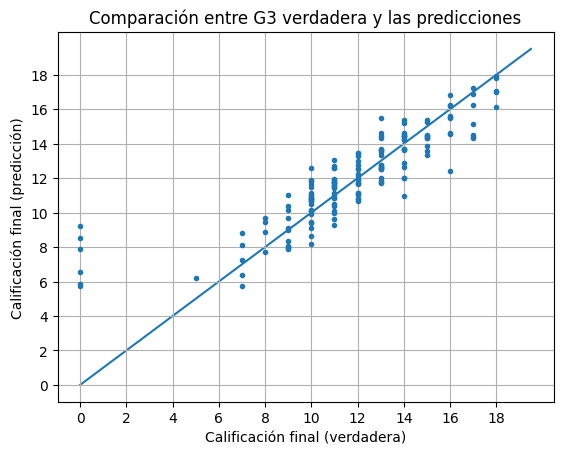

In [24]:
rango_g3_verdadera = np.arange(0, 20, 0.5)
valor_g3_prediccion_ideal = rango_g3_verdadera

fig, ax = plt.subplots()
ax.scatter(g3_prueba, predicciones_g3, marker=".", zorder=2)
ax.plot(rango_g3_verdadera, valor_g3_prediccion_ideal, zorder=1)

ax.set_title("Comparación entre G3 verdadera y las predicciones")
ax.set_xlabel("Calificación final (verdadera)")
ax.set_xticks(range(0, 20, 2))
ax.set_ylabel("Calificación final (predicción)")
ax.set_yticks(range(0, 20, 2))
ax.grid(True)

plt.savefig("graficas/student/dispersión_modelo_lineal.png", dpi=300)
plt.show()